In [1]:
import sys
import math
import cmath
from csv import writer
from ctypes import sizeof
import matplotlib.pyplot as plt
import matplotlib.animation as animate
import numpy as np
import scipy as sci
from mpl_toolkits.mplot3d import Axes3D

In [6]:
x_size = 100
y_size = 100
V0 = 0.5
corr_len = 10
strV0 = ''
strCorr_len = ''
if V0 == int(V0):
    strV0 = str(int(V0))
else:
    strV0 = str(V0)

if corr_len == int(corr_len):
    strCorr_len = str(int(corr_len))
else:
    strCorr_len = str(corr_len)
dataSpec = str(x_size) + "x" + str(y_size) + \
    "_V0_" + strV0 + "_" + strCorr_len

Writer = animate.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=2**16)
fps = 24

data = np.genfromtxt("data/" + dataSpec + "/Mean/mean.dat",
                        dtype=np.complex128)  # + "/Mean/mean.dat")
frn = len(data[0,:])

X = np.arange(0, x_size, 1)
Y = np.arange(0, y_size, 1)
X, Y = np.meshgrid(X, Y)
Z = np.zeros((x_size, y_size, frn))

# for i in range(len(data)):
#    Z[:, :, i] = data[i].reshape(x_size, y_size)

def change_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(
        X, Y, zarray[:, :, frame_number], cmap="plasma")

def to_pos(dat):
    psi = np.zeros((x_size, y_size, frn), dtype=np.complex128)
    psi2 = np.zeros((x_size, y_size, frn))
    for t in range(frn):
        for i in range(x_size):
            for j in range(y_size):
                psi[i, j, t] = (-1)**(i+j) * dat[i*y_size + j,t]
        psi[:, :, t] = np.fft.ifft2(psi[:, :, t])
    psi2 = np.array([[[abs(psi[i, j, t])**2 for t in range(frn)] for j in range(y_size)]
                        for i in range(x_size)])
    return psi2

In [7]:
print(data.shape)
print(frn)

(10000, 1000)
1000


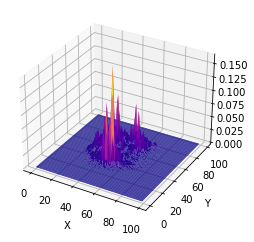

In [8]:
Psi_p2 = np.array([[[abs(data[i*y_size + j, k])**2 for k in range(frn)] for j in range(y_size)]
                    for i in range(x_size)])

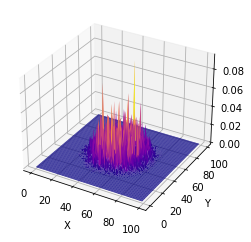

In [11]:
Psi2 = to_pos(data)
Z = Psi_p2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')


plot = [ax.plot_surface(
    X, Y, Z[:, :, 500], cmap="plasma", rstride=1, cstride=1)]

#ax.set_zlim(0, 0.1)
#ani = animate.FuncAnimation(fig, change_plot, frn,
                            #fargs=(Z, plot), interval=1000 / fps)

#ax.axis('off')
#ani.save('img/im.mp4', writer=writer)

plt.show()